inhibitors : https://www.medchemexpress.com/Targets/Glutathione%20Peroxidase.html


Articles : 
- Selective covalent targeting of GPX4
- Diacylfurozans are masked nitrile oxides that inhibit GPX4 covalently
- Targeting a Therapy-Resistant Cancer Cell State Using Masked Electrophiles as GPX4 Inhibitors
- Medicinal Research Reviews - 2023 - Koeberle - Ferroptosis%E2%80%90modulating small molecules for targeting drug%E2%80%90resistant cancer 

Descarreguem una llibreria de ChemDiv "Cyteine Targeted Covalent Library". 

Imatge de inhibidor covalent ML210:   https://www.nature.com/articles/s41589-020-0501-5



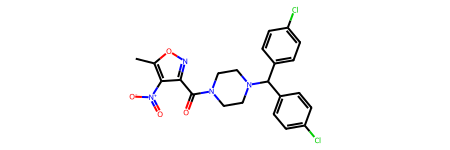

In [77]:

smiles_ml210 = "Cc1onc(C(=O)N2CCN(C(c3ccc(Cl)cc3)c3ccc(Cl)cc3)CC2)c1[N+](=O)[O-]"

from rdkit import Chem
molecule=Chem.MolFromSmiles(smiles_ml210)

molecule

In [2]:
mol = Chem.MolFromSmiles("Cc1onc(C(=O)N2CCN(C(c3ccc(Cl)cc3)c3ccc(Cl)cc3)CC2)c1[N+](=O)[O-]")
d = Chem.Draw.rdMolDraw2D.MolDraw2DCairo(250, 200) # or MolDraw2DSVG to get SVGs
mol.GetAtomWithIdx(2).SetProp('atomNote', 'foo')
mol.GetBondWithIdx(0).SetProp('bondNote', 'bar')
d.drawOptions().addStereoAnnotation = True
d.drawOptions().addAtomIndices = True
d.DrawMolecule(mol)
d.FinishDrawing()
d.WriteDrawingText('../output/atom_annotation_1.png') 



In [89]:
#Read a database sdf file

from rdkit import Chem
from rdkit.Chem import SDMolSupplier
import pandas as pd

import os, requests
path = '/Users/carlafeliu/Docs/Master/TFM/github'
sdffile='Download_SDF_Covalent_Cysteine_Library_39301.sdf'
localsdffile = os.path.join(path, sdffile)
if not os.path.exists(localsdffile):
    url = 'https://www.chemdiv.com/catalog/focused-and-targeted-libraries/cysteine-targeted-covalent-library/'+sdffile
    response = requests.get(url)
    with open(localsdffile, 'wb') as f:
        f.write(response.content)
        

database = Chem.SDMolSupplier('../../../Download_SDF_Covalent_Cysteine_Library_39301.sdf')

#Repassar el codi ja que no em baixa la base de dades igual que quan ho faig manualment i per tant el codi de després no funciona.



In [99]:
#Create a dataframe
from rdkit import Chem
from rdkit.Chem import Crippen, Descriptors
#from rdkit_forchemprop import features (tenim aquesta funció en un altre document, mirar que hi passa)

def features(mol,data):
    #Extract properties using RDKit functions
    mol_name = mol.GetProp('Name')
    smiles = Chem.MolToSmiles(mol)
    formula = Chem.rdMolDescriptors.CalcMolFormula(mol)
    mw= Chem.rdMolDescriptors.CalcExactMolWt(mol)
    logp= Crippen.MolLogP(mol)
    num_hbd = Chem.rdMolDescriptors.CalcNumHBD(mol)
    num_hba = Chem.rdMolDescriptors.CalcNumHBA(mol)
    tpsa = Chem.rdMolDescriptors.CalcTPSA(mol)
    num_rb = Chem.rdMolDescriptors.CalcNumRotatableBonds(mol)

    #Append results in a data list
    data.append([smiles,mol_name,formula,mw,logp,num_hbd,num_hba,tpsa, num_rb])
    return

data = [ ]

for mol in database:
    features(mol,data)

#We have a list with information. Creation of a Dataframe:
df= pd.DataFrame(data,columns=['SMILES','Name','Formula','MW','logP',"H-bond donor","H-bond acceptor","TPSA","Rotatable bonds"])

In [88]:
#Print information about database
print(df.head(10))


                                              SMILES  \
0                               C(#Cc1cccs1)c1ccccc1   
1            c1ccc(C2=NC(c3ccccc3)N3C2C3c2ccccc2)cc1   
2  C(#Cc1ccc(C2Nc3ccccc3C(c3ccccc3)(c3ccccc3)O2)o...   
3                         C(#Cc1csc2ccccc12)c1ccccc1   
4  C(#Cc1cccc(-c2nc3ccccc3nc2-c2cccc(C#Cc3ccc(Sc4...   
5  C(#Cc1cccc(-c2nc3ccccc3nc2-c2cccc(C#Cc3ccc(Oc4...   
6                              C(#Cc1ccccc1)c1ccccc1   
7            C(#Cc1cc(C#Cc2ccccc2)c2nonc2c1)c1ccccc1   
8                 C(#Cc1ccc2c(c1)sc1ccccc12)c1ccccc1   
9              C(#Cc1ccc2noc(-c3ccccc3)c2c1)c1ccccc1   

                                                Name     Formula          MW  \
0                    2-(2-phenyl-1-ethynyl)thiophene      C12H8S  184.034671   
1   2,4,6-triphenyl-1,3-diazabicyclo[3.1.0]hex-3-ene    C22H18N2  310.146999   
2  4,4-diphenyl-2-[5-(2-phenylethynyl)furan-2-yl]...   C32H23NO2  453.172879   
3               3-(2-phenylethynyl)-1-benzothiophene     C16H10

Important molecular descriptors to find an inhibitor: 
- Molecular weight (MW): Generally, the smallest molecules can easily penetrate the cell membrane and reach the target enzyme.
- Hydrogen bond donor and acceptor (HBD,HBA): Many inhibitors interact with the protein through hydrogen bounds.
- Lipophilicity (logP): With moderate logP (low), can easily penetrate the cell membrane while also interacting with the hydrophobic residues in th enzyme active site. 
- Polar surface area (PSA): High PSA may hinder (dificultar) the entry of compounds in the cell, and very small PSA may reduce the potency of inhibitors. Moderate is preferred. 
- Electrostatic potential (ESP) Van der Waals surface area (VSA): are usually used to analyse the shape and charge distribution of the molecule, which can affect the binding affinity of inhibitors to the GPX enzyme. 
- Number of rotatable bonds: Predicting the conformational flexibility of a molecule, that can affect its ability to bind to a target. 

Treiem la informació de les molècules que hem vist que inhibien GPX. Fem RDkit. 

- Tiopronin
https://go.drugbank.com/drugs/DB06823
https://www.ebi.ac.uk/chembl/compound_report_card/CHEMBL1314/

- ML210
https://www.ebi.ac.uk/chembl/compound_report_card/CHEMBL1951048/

https://www.selleckchem.com/products/ml210.html
https://www.tocris.com/products/ml-210_6429

- RSL3
https://www.ebi.ac.uk/chembl/compound_report_card/CHEMBL4747331/


Podem baixar la base de dades de chembl i buscar molecules amb aquestes característiques??

Per baixar bbdd Chembl:
https://ftp.ebi.ac.uk/pub/databases/chembl/ChEMBLdb/latest/

https://www.chemdiv.com/catalog/focused-and-targeted-libraries/cysteine-targeted-covalent-library/




Molecular weight: 163.198
LogP: -0.49450000000000044
H-bond donor: 3
H-bond acceptor: 3
Polar surface area: 66.4


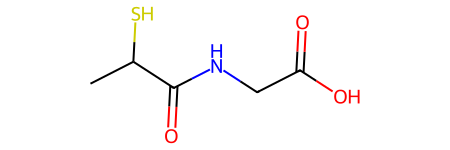

In [78]:
#Extreure informacio de molecules concretes:
# https://go.drugbank.com/drugs/DB06823
# Tiopronin

print('TIOPRONIN')

from rdkit import Chem
from rdkit.Chem import Descriptors

tiopronine_smiles = 'CC(S)C(=O)NCC(O)=O'
mol_tiop = Chem.MolFromSmiles(tiopronine_smiles)

tmw = Descriptors.MolWt(mol_tiop)
tlogp = Descriptors.MolLogP(mol_tiop)
tnum_hbd = Descriptors.NumHDonors(mol_tiop)
tnum_hba = Descriptors.NumHAcceptors(mol_tiop)
tpsa = Descriptors.TPSA(mol_tiop)

print(f'Molecular weight: {tmw}')
print(f'LogP: {tlogp}')
print(f'H-bond donor: {tnum_hbd}')
print(f'H-bond acceptor: {tnum_hba}')
print(f'Polar surface area: {tpsa}')

mol_tiop



Molecular weight: 475.3320000000002
LogP: 4.745420000000005
H-bond donor: 0
H-bond acceptor: 6
Polar surface area: 66.4


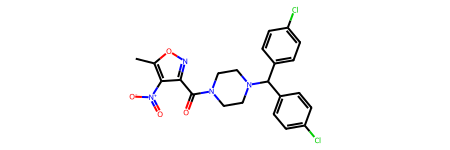

In [80]:
print('ML210')
smiles_ml210 = "Cc1onc(C(=O)N2CCN(C(c3ccc(Cl)cc3)c3ccc(Cl)cc3)CC2)c1[N+](=O)[O-]"

#Fer servir la funció features

from rdkit import Chem
mol_ml210=Chem.MolFromSmiles(smiles_ml210)

ml210mw = Descriptors.MolWt(mol_ml210)
ml210logp = Descriptors.MolLogP(mol_ml210)
ml210num_hbd = Descriptors.NumHDonors(mol_ml210)
ml210num_hba = Descriptors.NumHAcceptors(mol_ml210)
ml210psa = Descriptors.TPSA(mol_ml210)

print(f'Molecular weight: {ml210mw}')
print(f'LogP: {ml210logp}')
print(f'H-bond donor: {ml210num_hbd}')
print(f'H-bond acceptor: {ml210num_hba}')
print(f'Polar surface area: {ml210psa}')

mol_ml210

RSL3
Molecular weight: 440.88300000000015
LogP: 3.2090000000000014
H-bond donor: 1
H-bond acceptor: 5
Polar surface area: 88.69999999999999


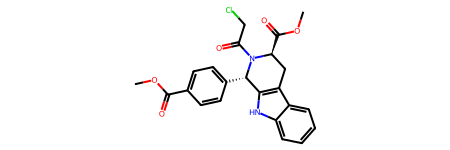

In [92]:
print('RSL3')

smiles_rsl3 = 'COC(=O)c1ccc([C@H]2c3[nH]c4ccccc4c3C[C@H](C(=O)OC)N2C(=O)CCl)cc1'

from rdkit import Chem
mol_rsl3=Chem.MolFromSmiles(smiles_rsl3)

#rsname = mol_rsl3.GetProp("Name")
rsmw = Descriptors.MolWt(mol_rsl3)
rslogp = Descriptors.MolLogP(mol_rsl3)
rsnum_hbd = Descriptors.NumHDonors(mol_rsl3)
rsnum_hba = Descriptors.NumHAcceptors(mol_rsl3)
rspsa = Descriptors.TPSA(mol_rsl3)

#print(f'Name: {rsname}')
print(f'Molecular weight: {rsmw}')
print(f'LogP: {rslogp}')
print(f'H-bond donor: {rsnum_hbd}')
print(f'H-bond acceptor: {rsnum_hba}')
print(f'Polar surface area: {rspsa}')

mol_rsl3

**Bold text**
Molecular weight: 477.4130000000001
LogP: 5.082100000000004
H-bond donor: 1
H-bond acceptor: 4
Polar surface area: 58.64


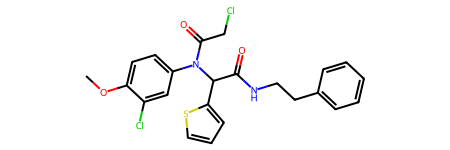

In [86]:
print('ML162')
smiles_ml162 = 'COc1ccc(N(C(=O)CCl)C(C(=O)NCCc2ccccc2)c2cccs2)cc1Cl'

from rdkit import Chem
mol_ml162=Chem.MolFromSmiles(smiles_ml162)

ml162mw = Descriptors.MolWt(mol_ml162)
ml162logp = Descriptors.MolLogP(mol_ml162)
ml162num_hbd = Descriptors.NumHDonors(mol_ml162)
ml162num_hba = Descriptors.NumHAcceptors(mol_ml162)
ml162psa = Descriptors.TPSA(mol_ml162)

print(f'Molecular weight: {ml162mw}')
print(f'LogP: {ml162logp}')
print(f'H-bond donor: {ml162num_hbd}')
print(f'H-bond acceptor: {ml162num_hba}')
print(f'Polar surface area: {ml162psa}')

mol_ml162